In [5]:
import pickle as plk
import os

import numpy as np
import matplotlib.pyplot as plt



In [8]:
injection_runs = os.listdir("gnz11_split/injection")
old_summary = np.loadtxt("gnz11_split/injection_results-old.dat")
new_summary = np.loadtxt("gnz11_split/injection_results.dat")

In [12]:
old_disc = old_summary[:, 4] - old_summary[:, 2]
Nold = old_disc.shape[0]
Nold_neg = np.sum(old_disc < 0)
print(F"In old run:\n{Nold_neg} out of {Nold} runs have negative disc, frac={Nold_neg/Nold:0.4f}")

new_disc = new_summary[:, 4] - new_summary[:, 2]
Nold = new_disc.shape[0]
Nold_neg = np.sum(new_disc < 0)
print(F"In new run:\n{Nold_neg} out of {Nold} runs have negative disc, frac={Nold_neg/Nold:0.4f}")

In old run:
32 out of 905 runs have negative disc, frac=0.0354
In new run:
0 out of 905 runs have negative disc, frac=0.0000


In [16]:
negatives = old_summary[old_disc < 0, 0]
print(F"lam0 with negative disc in old run:\n {negatives}")

lam0 with negative disc in old run:
 [1.0021194  1.21004737 1.26339258 1.42948204 1.5344152  1.67843112
 1.94625782 1.94865318 1.95105075 2.01663371 2.0190945  2.02155759
 2.05378818 2.15287534 2.15546431 2.3346633  2.33742594 2.38480045
 2.39324164 2.4993924  2.50231464 2.56136189 2.63070953 2.68918956
 2.78698749 2.84842801 2.87464637 2.87793835 2.92437168 2.92771319
 3.07809286 3.08158813]


In [17]:
get_negatives = np.zeros(new_summary.shape[0], dtype=bool)
for lam in negatives:
    found = np.argmin(np.abs(new_summary[:, 0] - lam))
    get_negatives[found] = True

In [22]:
print(new_summary[get_negatives, 0])
print()
print(np.min(np.abs(new_summary[get_negatives, 0] - negatives)))


[1.0021194  1.21004737 1.26339258 1.42948204 1.5344152  1.67843112
 1.94625782 1.94865318 1.95105075 2.01663371 2.0190945  2.02155759
 2.05378818 2.15287534 2.15546431 2.3346633  2.33742594 2.38480045
 2.39324164 2.4993924  2.50231464 2.56136189 2.63070953 2.68918956
 2.78698749 2.84842801 2.87464637 2.87793835 2.92437168 2.92771319
 3.07809286 3.08158813]

0.0


In [23]:
np.min(np.abs(new_summary[:, 0] - old_summary[:, 0]))

0.0

In [27]:
compares = {}
for negative in negatives:
    for run in injection_runs:
        m_str = F"{negative:0.4f}"
        if m_str in run:
            if m_str not in compares:
                compares[m_str] = {}
            if "old" in run:
                compares[m_str]["old"] = run
            if "noise" in run:
                compares[m_str]["new"] = run
compares
        

{'1.0021': {'new': 'trial-noise-0-1.002119.pkl',
  'old': 'trial-old-7-1.002119.pkl'},
 '1.2100': {'new': 'trial-noise-0-1.210047.pkl',
  'old': 'trial-old-131-1.210047.pkl'},
 '1.5344': {'new': 'trial-noise-0-1.534415.pkl',
  'old': 'trial-old-303-1.534415.pkl'},
 '1.6784': {'old': 'trial-old-371-1.678431.pkl',
  'new': 'trial-noise-0-1.678431.pkl'},
 '2.0166': {'new': 'trial-noise-0-2.016634.pkl',
  'old': 'trial-old-518-2.016634.pkl'},
 '2.3374': {'new': 'trial-noise-0-2.337426.pkl',
  'old': 'trial-old-641-2.337426.pkl'},
 '2.3848': {'new': 'trial-noise-0-2.384800.pkl',
  'old': 'trial-old-658-2.384800.pkl'},
 '2.3932': {'new': 'trial-noise-0-2.393242.pkl',
  'old': 'trial-old-661-2.393242.pkl'},
 '2.5023': {'old': 'trial-old-699-2.502315.pkl',
  'new': 'trial-noise-0-2.502315.pkl'},
 '2.6307': {'new': 'trial-noise-0-2.630710.pkl',
  'old': 'trial-old-742-2.630710.pkl'},
 '2.8484': {'old': 'trial-old-811-2.848428.pkl',
  'new': 'trial-noise-0-2.848428.pkl'},
 '2.8746': {'new': 'tri

In [33]:
m0 = list(compares.keys())[0]

old = plk.load(open(F"gnz11_split/injection/{compares[m0]['old']}", "rb"))
new = plk.load(open(F"gnz11_split/injection/{compares[m0]['new']}", "rb"))


In [48]:
for spec in old["data"]:
    print(spec["lam"].min(), spec["lam"].max())

print()
for spec in new["data"]:
    print(spec["lam"].min(), spec["lam"].max())

1.6598548511483593 3.168681218836345
0.9896315145222142 1.659067246022365

0.9902672559576369 1.0684634525146346


(0.19, 0.25)

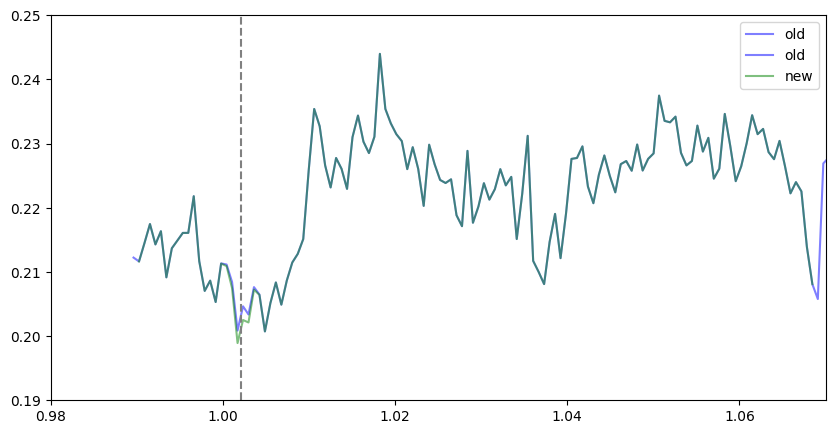

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

color='blue'
for spec in old["data"]:
    ax.plot(spec["lam"], spec["sky"], alpha=0.5, color=color, label='old')

color='green'
for spec in new["data"]:
    ax.plot(spec["lam"], spec["sky"], alpha=0.5, color=color, label='new')

ax.axvline(float(m0), color='gray', linestyle='--')

ax.legend()
ax.set_xlim(0.98, 1.07)
ax.set_ylim(0.19, 0.25)


In [58]:
import DMdecay as dmd
import JWSTutils as jwst
import gnz11_split

In [59]:
orig_configs = dmd.prep.parse_configs("gnz11_split/gnz11_split.toml")

orig_data = jwst.process_datafiles(orig_configs["run"]["paths"], 
                                orig_configs["system"]["res_path"])
orig_data = gnz11_split.partition_gnz11(orig_data, 
                                    orig_configs["run"]["lambda_min"],
                                    orig_configs["run"]["lambda_split"])
for spec in orig_data:
    dmd.prep.doppler_correction(spec, orig_configs["halo"])
    dmd.prep.add_Dfactor(spec, orig_configs["halo"])

parsing gnz11_split/gnz11_split.toml
processing 2 datafiles...


(0.195, 0.215)

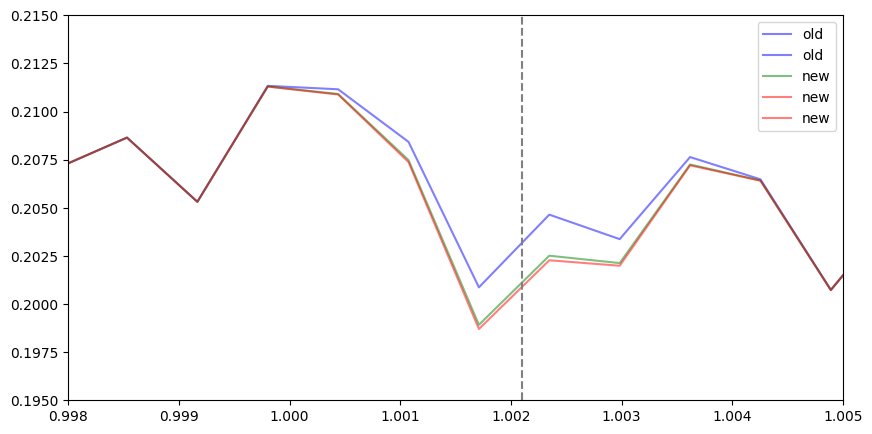

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

color='blue'
for spec in old["data"]:
    ax.plot(spec["lam"], spec["sky"], alpha=0.5, color=color, label='old')

color='green'
for spec in new["data"]:
    ax.plot(spec["lam"], spec["sky"], alpha=0.5, color=color, label='new')

color='red'
for spec in orig_data:
    ax.plot(spec["lam"], spec["sky"], alpha=0.5, color=color, label='new')

ax.axvline(float(m0), color='gray', linestyle='--')

ax.legend()
ax.set_xlim(0.998, 1.005)
ax.set_ylim(0.195, 0.215)

In [72]:
print(F"old injection params:\n"
      F"G:{old['G']:0.3e}, limit:{old['new_rawlimit']:0.3e}")

print(F"new injection params:\n"
      F"G:{new['G']:0.3e}, limit:{new['new_rawlimit']:0.3e}")

old injection params:
G:1.624e-05, limit:1.623e-05
new injection params:
G:1.624e-06, limit:1.517e-05


In [69]:
old.keys()

dict_keys(['lam_test', 'data', 'G', 'new_bf', 'new_rawlimit'])

In [73]:
orig_data

[{'lam': array([1.65985485, 1.66091442, 1.66197399, ..., 3.16656208, 3.16762165,
         3.16868122]),
  'sky': array([0.17215958, 0.17181851, 0.16476989, ..., 0.03401792, 0.02775385,
         0.02199137]),
  'error': array([0.00154223, 0.001742  , 0.00161864, ..., 0.00143556, 0.00180074,
         0.00493607]),
  'name': 'GN-z11',
  'ra': 189.1060420833333,
  'dec': 62.24204166666667,
  'skycoord': <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
      (189.10604208, 62.24204167, 1.)>,
  'b': 54.79774431840697,
  'l': 125.96364875475768,
  'instrument': 'NIRSPEC',
  'detector': 'NRS1',
  'int_time': 1896.5557,
  'lambda_min': 1.6605299666407518,
  'lambda_max': 3.169970021757763,
  'path': 'data/mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426-o001_t001_nirspec_g235m-f170lp_x1d.fits',
  'grating': 'G235M',
  'filter': 'F170LP',
  'res': 0.00235406953795375,
  'v_rel': 0.0004065662806184103,
  'D': 3.815116851415465},
 {'lam': array([0.98963151, 0.99026726, 0.99

In [77]:
gen = np.random.default_rng()
sigma = np.arange(0, 10)
sigma[0] = np.nan
print(sigma)
gen.normal(loc=0, scale=sigma)

ValueError: cannot convert float NaN to integer

In [78]:
sigma

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
sigma > 0

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])